# CSC 535 Final Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import yfinance as yf


# 4 groups of stocks, each with 5 companies, from different industries (Tech, Financial, Food and Drink, Health)

In [2]:
stock_list = {
    'Microsoft': 'MSFT', 
    'Amazon': 'AMZN', 
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'Snap': 'SNAP',
    'Bank of America': 'BAC',
    'JPMorgan Chase': 'JPM',
    'Mastercard': 'MA',
    'American Express': 'AXP',
    'Capital One': 'COF',
    'Nestle': 'NSRGY',
    'PepsiCo': 'PEP',
    'Uilever': 'UL',
    'Monster': 'MNST',
    'Hershey': 'HSY',
    'Abbott': 'ABT',
    'ResMed': 'RMD',
    'Bio-Rad Laboratories': 'BIO',
    'ABIOMED': 'ABMD',
    'Pfizer': 'PFE',
}
ticker_list = list(stock_list.values())
name_list = list(stock_list.keys())

In [3]:
msft = yf.Tickers(ticker_list)

df = pd.DataFrame(msft.history(period='5d', interval='1d'))
df.fillna(np.nan)


# Stock movement(returns) in the last 5 days
returns = (df.Close.to_numpy()[-1] / df.Open.to_numpy()[0] - 1)*100
# print(returns)

# Stock volatility in the last 5 days
volatility = df.Close.to_numpy().std(axis=0)



[*********************100%***********************]  20 of 20 completed


In [4]:
attr_list = ['ebitdaMargins', 'profitMargins', 'grossMargins', 'revenueGrowth', 'earningsGrowth', 'returnOnAssets', 'debtToEquity', 'returnOnEquity']
df = pd.DataFrame(columns=attr_list, index=name_list)
for name in name_list:
    info = yf.Ticker(stock_list[name]).info
    for attr in attr_list:
        df[attr][name] = info[attr]

In [5]:
df.insert(len(df.columns),'returns',returns)
df.insert(len(df.columns),'volatility',volatility)
print(df)

                     ebitdaMargins profitMargins grossMargins revenueGrowth  \
Microsoft                  0.48649       0.38515      0.68865          0.22   
Amazon                     0.13382       0.06641      0.40679         0.272   
Tesla                      0.15512       0.07403      0.23107         0.568   
Netflix                    0.21635       0.14243      0.41098         0.242   
Snap                      -0.19596      -0.22489      0.54027         1.162   
Bank of America                  0        0.3337            0         0.234   
JPMorgan Chase                   0       0.37177            0          0.45   
Mastercard                 0.57505       0.45497            1         0.299   
American Express                 0       0.18895       0.7108         0.375   
Capital One                      0       0.38679            0         2.694   
Nestle                     0.19714       0.14412       0.4938         0.015   
PepsiCo                    0.18371       0.11005    

# Dimentionality Reduction Using PCA

In [6]:
df_clean = df.dropna()
X = df_clean.to_numpy()
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Using the elbow method to find the besk number of cluster for K-means

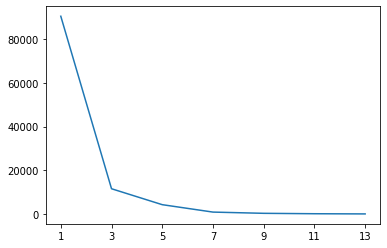

In [7]:
# X = np.array([returns, returns_to_volatility]).T
X = X_reduced
distortion = []
K = range(1,len(X),2)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
    

plt.xticks(K)
plt.plot(K,distortion)
plt.show()


## Using the "Elbow Method", 3 is the most suitable number of cluster to go with

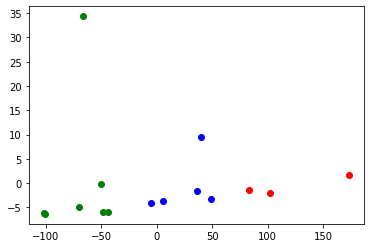

In [8]:
k = 3
labels = KMeans(n_clusters=k).fit_predict(X)
# print(labels)
df_labeled = pd.DataFrame({'labels': labels, '0': X.T[0], '1': X.T[1]})

colors = ['r', 'g', 'b', 'black', 'orange', 'pink', 'purple']
for i in range(k):
    plt.scatter(df_labeled['0'][labels == i], 
                df_labeled['1'][labels == i], 
                color=colors[i])

# Calculate returns to volatility ratios then print output to csv

In [9]:
df_clean.insert(0, 'labels', labels)
df_clean.insert(len(df_clean.columns), 'returns_to_volatility', df_clean['returns'] / df_clean['volatility'])    

df_clean.to_csv('Final Clustered K-mean.csv')